# Fourth-Order Runge-Kutta Method

Running the following cell defines a function

*runge_kutta_4o()*

which may be applied to integrate systems of ordinary differential equations by means of the "classical fourth-order" Runge-Kutta method.

In [1]:
function [x,t] = runge_kutta_4o(f,to,tf,xo,ntsteps)
 
 % This function implements the Classical Fourth-Order Runge-Kutta Method
 % as described in Brian Bradie's "A Friendly Introduction to Numerical Analysis"
 % to integrate a system of ordinary differential equations (ODEs).
 % The inputs are the differential equations f=0, the initial time to, the final
 % time tf, the initial conditions xo, and the number of time steps ntsteps.
 % The function returns x and t, the solution and time arrays.
 
 h = (tf-to)/ntsteps;          % Calculate step size h
 t = linspace(to,tf,ntsteps);   % Vector containing times, to -> tf
 x = reshape(xo,length(xo),1); % Initializing solution x to xo
 
 for ii = 1 : (length(t)-1);   % For each time step but the last,
 
  k1 = h * reshape(f( x(:,ii)      ,  t(:,ii)     ), length(xo), 1); % k1, k2, k3, and k4 require function
  k2 = h * reshape(f( x(:,ii)+k1/2 ,  t(:,ii)+h/2 ), length(xo), 1); % evaluations "f(x,t)" and are used to 
  k3 = h * reshape(f( x(:,ii)+k2/2 ,  t(:,ii)+h/2 ), length(xo), 1); % calculate the approximate solution 
  k4 = h * reshape(f( x(:,ii)+k3   ,  t(:,ii)+h   ), length(xo), 1); % at the next time step
  
  x(:,ii+1) = x(:,ii) + 1/6 * (k1 + 2*k2 + 2*k3 + k4); % Calculate solution at following time step
  
 end
 
end

## Demonstration of Function Use

The function defined above is applied to approximate the motion of the system of springs, masses, and dampers shown in the following cell:

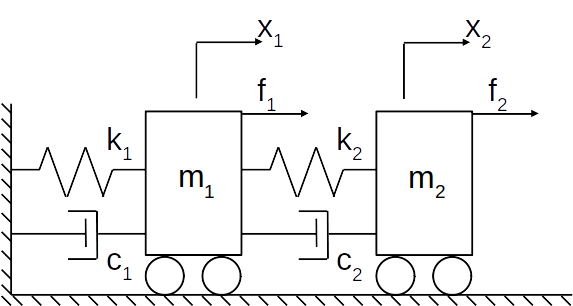

A summation of forces on each of the masses yields the following system of coupled ordinary differential equations:

\begin{equation}
\begin{bmatrix}
m_{1} & 0 \\
0     & m_{2}
\end{bmatrix}
\begin{bmatrix}
\ddot{x}_{1} \\
\ddot{x}_{2}
\end{bmatrix}
+
\begin{bmatrix}
c_{1}+c_{2} & -c_{2} \\
     -c_{2} &  c_{2}
\end{bmatrix}
\begin{bmatrix}
\dot{x}_{1} \\
\dot{x}_{2}
\end{bmatrix}
+
\begin{bmatrix}
k_{1}+k_{2} & -k_{2} \\
     -k_{2} &  k_{2}
\end{bmatrix}
\begin{bmatrix}
x_{1} \\
x_{2}
\end{bmatrix}
=
\begin{bmatrix}
f_{1} \\
f_{2}
\end{bmatrix}
\end{equation}

The masses, damping coefficients, spring stiffnesses, and applied forces are set to unit values.

The masses are at rest at time $t=0$ when the forces $f_{1}$ and $f_{2}$ are applied.

The motion of the two masses during $0{\lt}t{\lt}30$ is calculated and plotted below. The masses are seen to oscillate, then settle near their steady-state displacements.

In [2]:
% CREATING FUNCTION TO DEFINE EQUATIONS OF MOTION
%
% Inputs  - Displacements, velocities, and the time:
%           [x1, x2, dot(x1), dot(x2)] as vector 'x', also time 't'
% Outputs - Velocities and accelerations:
%           [dot(x1), dot(x2), doubledot(x1), doubledot(x2)] as vector 'dx'

function [dx] = f(x,t)
 %
 m1 = 1; % Mass                m1: 1 kg
 m2 = 1; % Mass                m2: 1 kg
 c1 = 1; % Damping coefficient c1: 1 N-s/m 
 c2 = 1; % Damping coefficient c2: 1 N-s/m
 k1 = 1; % Spring stiffness    k1: 1 N/m
 k2 = 1; % Spring stiffness    k2: 1 N/m
 f1 = 1; % Applied force       f1: 1 N
 f2 = 1; % Applied force       f2: 1 N
 %
 dx1 = x(3);                                                       % Calculate velocity of mass 1
 dx2 = x(4);                                                       % Calculate velocity of mass 2
 ddx1 = (1/m1)*(f1-k1*x(1)-c1*x(3)+k2*(x(2)-x(1))+c2*(x(4)-x(3))); % Calculate accel'n of mass 1
 ddx2 = (1/m2)*(f2-k2*(x(2)-x(1))-c2*(x(4)-x(3)));                 % Calculate accel'n of mass 2
 %
 dx = [dx1;dx2;ddx1;ddx2]; % Return calculated velocities and accelerations in a vector
 %
end

In [3]:
% DEFINING SOLUTION PARAMETERS

% Set initial time, final time, and number of time steps
to      =  0;   % Initial time:             0 s
tf      = 30;   % Final time:              30 s
ntsteps = 3000; % Number of time steps:  3000

% Initial conditions:
xo = [0; ... % Initial displacement   x1 = 0 m
      0; ... % Initial displacement   x2 = 0 m
      0; ... % Initial velocity: dot(x1) = 0 m/s
      0];    % Initial velocity: dot(x2) = 0 m/s

In [4]:
% SOLUTION

% Apply fourth-order Runge-Kutta script above to solve
% with given equations and parameters

[x,t] = runge_kutta_4o(@f,to,tf,xo,ntsteps);

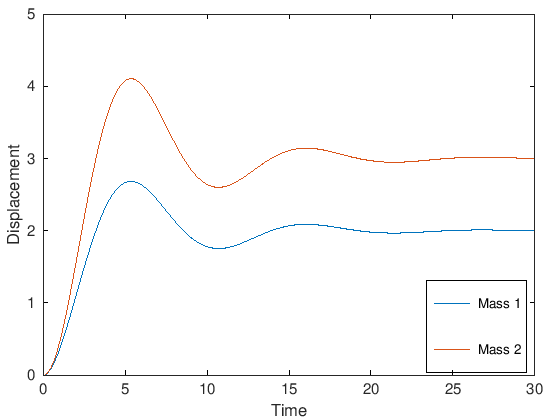

In [5]:
% PLOTTING RESULT

plot(t,x(1,:)); % Plot displacement x1 against time t,
hold on;        % and on the same plot
plot(t,x(2,:)); % Plot displacement x2 against time t
xlabel('Time');                                   % Set x-axis label
ylabel('Displacement');                           % Set y-axis label
set(gca,'FontSize',15);                           % Set font size
legend('Mass 1','Mass 2','location','southeast'); % Add legend